In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import KFold,cross_val_score

import pickle
import warnings
warnings.filterwarnings('ignore')

In [189]:
data_train = pd.read_csv('/Users/mitssverma/Documents/DataTrainned/Flip Robo/Dataset/Malignant Comments Classifier Project/train.csv')
data_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Dataset :
- Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
- Highly Malignant: It denotes comments that are highly malignant and hurtful. 
- Rude: It denotes comments that are very rude and offensive.
- Threat: It contains indication of the comments that are giving any threat to someone. 	
- Abuse: It is for comments that are abusive in nature. 
- Loathe: It describes the comments which are hateful and loathing in nature.  
- ID: It includes unique Ids associated with each comment text given.   
- Comment text: This column contains the comments extracted from various social media platforms. 

## EDA

In [190]:
data_train.shape

(159571, 8)

In [191]:
data_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [192]:
data_train.isna().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [193]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


## Visualization 

Column Name :-  malignant
Value Counts:
 0    144277
1     15294
Name: malignant, dtype: int64


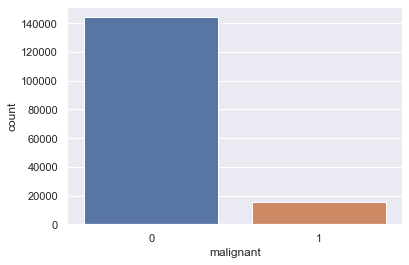

**********************************************************************
Column Name :-  highly_malignant
Value Counts:
 0    157976
1      1595
Name: highly_malignant, dtype: int64


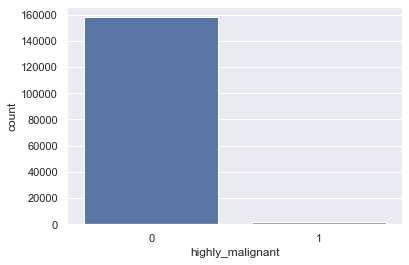

**********************************************************************
Column Name :-  loathe
Value Counts:
 0    158166
1      1405
Name: loathe, dtype: int64


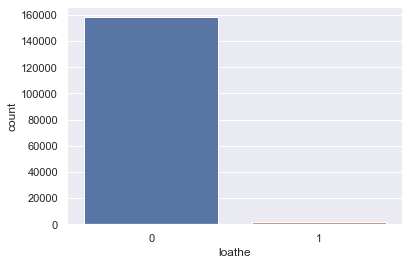

**********************************************************************
Column Name :-  rude
Value Counts:
 0    151122
1      8449
Name: rude, dtype: int64


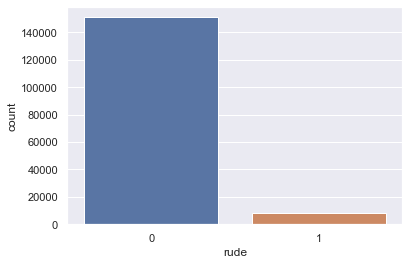

**********************************************************************
Column Name :-  abuse
Value Counts:
 0    151694
1      7877
Name: abuse, dtype: int64


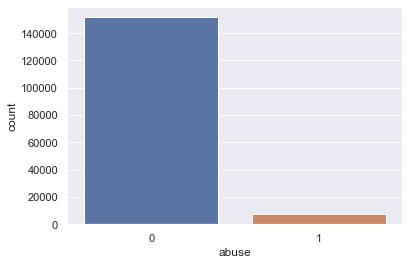

**********************************************************************
Column Name :-  threat
Value Counts:
 0    159093
1       478
Name: threat, dtype: int64


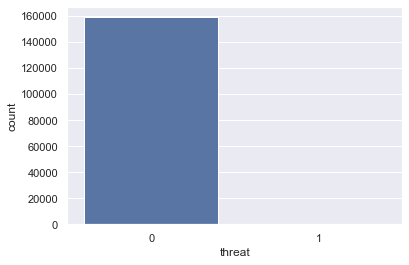

**********************************************************************


In [210]:
for i in data_train[['malignant','highly_malignant','loathe','rude','abuse','threat']]:
    print('Column Name :- ',i)
    print('Value Counts:\n',data_train[i].value_counts())
    sns.countplot(data_train[i])
    plt.show()
    print('**********************************************************************')

## Natural Language Processing (NLP) 

## Data Preprocessing

In [211]:
data_train.drop('id',axis = 1, inplace = True)

In [146]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mitssverma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [147]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mitssverma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [148]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mitssverma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**- Stop Words**

In [212]:
stop_words = stopwords.words('english')

**- Original Length**

In [213]:
original = data_train['comment_text'].str.len()

**- Converting to lower case**

In [214]:
data_train['comment_text'] = data_train['comment_text'].str.lower()

**- Removing Email Addresses**

In [215]:
data_train['comment_text'] = data_train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','')

**- Removing the URL's**

In [216]:
data_train['comment_text'] = data_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','')

**- Converting $ symbol to doller**

In [217]:
data_train['comment_text'] = data_train['comment_text'].str.replace(r'£|\$', 'dollers')

**- Replacing 10 digit phone no. to phonenumber**

In [218]:
data_train['comment_text'] = data_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

**- Removing the numbers**

In [219]:
data_train['comment_text'] = data_train['comment_text'].str.replace(r'\d+(\.\d+)?', '')

**- Dealing with Punctuation**

In [220]:
data_train['comment_text'] = data_train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() 
                                                                                 if term not in string.punctuation))

**- Removing Stop word**

In [221]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
data_train['comment_text'] = data_train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() 
                                                                                 if term not in stop_words))

**- Applying Lemmatization**

In [222]:
lem = WordNetLemmatizer()
data_train['comment_text'] = data_train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) 
                                                                                 for t in x.split()))

**Cleaned Length**

In [223]:
clean = data_train.comment_text.str.len()

In [225]:
print ('Origian Length :', original.sum())
print ('Clean Length :', clean.sum())

Origian Length : 62893130
Clean Length : 42481209


## Word Cloud

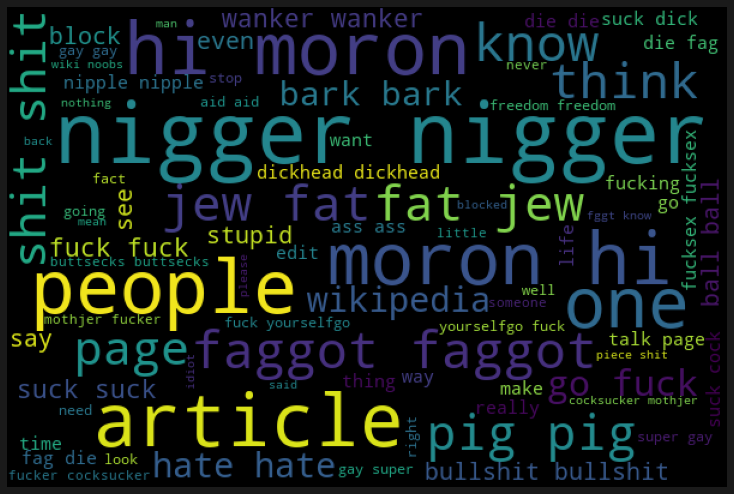

In [228]:
hams = data_train['comment_text'][data_train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=80).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Pie-Chart

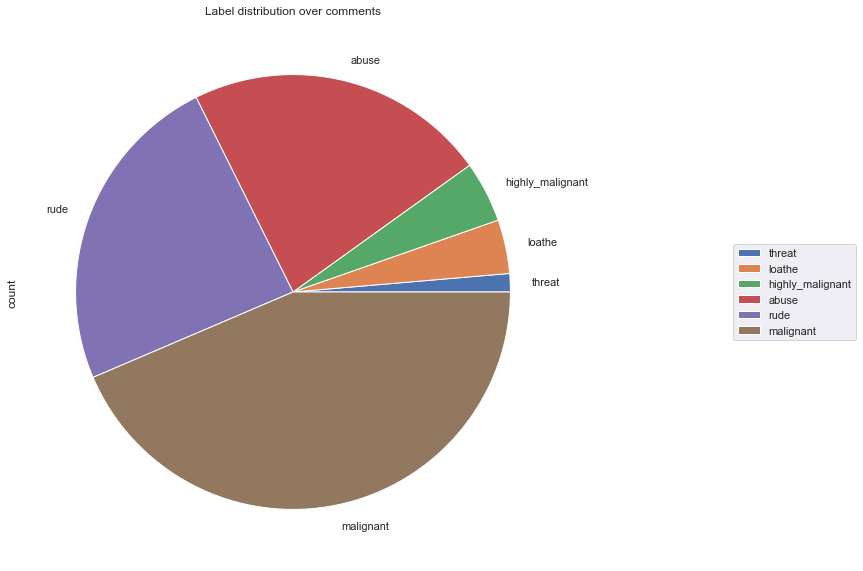

In [229]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = data_train[cols_target].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')

df_distribution.plot.pie(y='count',title='Label distribution over comments',figsize=(10,10)).legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

## Correlation

In [230]:
df = data_train.corr()

<AxesSubplot:>

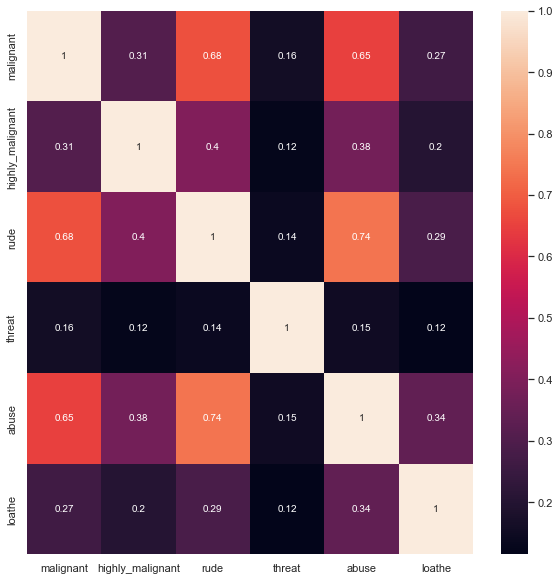

In [231]:
plt.figure(figsize = (10,10))
sns.heatmap(df,annot= True)

## Final Dataset

In [232]:
data_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0
2,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0
3,can't make real suggestion improvement wondere...,0,0,0,0,0,0
4,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::and second time asking, view completely ...",0,0,0,0,0,0
159567,ashamed horrible thing put talk page.,0,0,0,0,0,0
159568,"spitzer umm, there actual article prostitution...",0,0,0,0,0,0
159569,look like actually put speedy first version de...,0,0,0,0,0,0


## Encoding

**TF-IDF Vectorization**

In [233]:
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(data_train['comment_text'])
x = features

In [235]:
y = data_train.malignant

## Model Building

**- Train Test Split**

In [237]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 90)

**- Function for Training & Testing**

In [238]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))
        print('\n ----- Roc Curve ----- \n')
        plot_roc_curve(clas, x_test, y_test) 


**- Model Instantiating**

In [245]:
ada = AdaBoostClassifier()
gbr = GradientBoostingClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()

**- AdaBoost Classifier**


 ----- Train Result ----- 

Accuracy Score: 0.9470328715386287

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    108189
           1       0.88      0.52      0.65     11489

    accuracy                           0.95    119678
   macro avg       0.91      0.76      0.81    119678
weighted avg       0.94      0.95      0.94    119678


 ----- Confusion matrix ----- 
 [[107358    831]
 [  5508   5981]]

 ----- Test Result ----- 

Accuracy Score: 0.9458050284511067

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     36088
           1       0.86      0.52      0.64      3805

    accuracy                           0.95     39893
   macro avg       0.91      0.75      0.81     39893
weighted avg       0.94      0.95      0.94     39893


 ----- Confusion matrix ----- 
 [[35769   319]
 [ 1843  1962]]

 ----- Roc

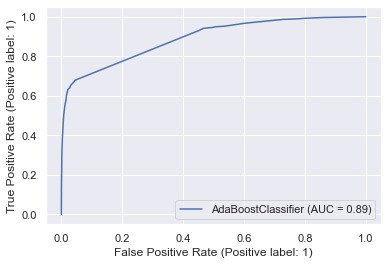

In [242]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)

**- GradientBoosting Classifier**


 ----- Train Result ----- 

Accuracy Score: 0.9432477147011147

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97    108189
           1       0.95      0.43      0.59     11489

    accuracy                           0.94    119678
   macro avg       0.95      0.71      0.78    119678
weighted avg       0.94      0.94      0.93    119678


 ----- Confusion matrix ----- 
 [[107940    249]
 [  6543   4946]]

 ----- Test Result ----- 

Accuracy Score: 0.9419447020780588

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     36088
           1       0.93      0.42      0.58      3805

    accuracy                           0.94     39893
   macro avg       0.94      0.71      0.78     39893
weighted avg       0.94      0.94      0.93     39893


 ----- Confusion matrix ----- 
 [[35970   118]
 [ 2198  1607]]

 ----- Roc

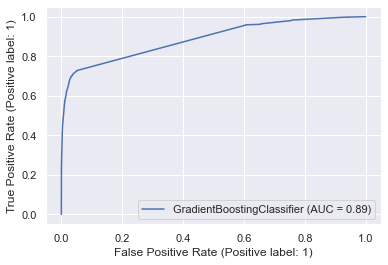

In [246]:
gbr.fit(x_train,y_train)
score(gbr, x_train,x_test,y_train,y_test,train = True)
score(gbr, x_train,x_test,y_train,y_test,train = False)

**- Logistic Regression**


 ----- Train Result ----- 

Accuracy Score: 0.9606193285315597

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    108189
           1       0.93      0.64      0.76     11489

    accuracy                           0.96    119678
   macro avg       0.95      0.82      0.87    119678
weighted avg       0.96      0.96      0.96    119678


 ----- Confusion matrix ----- 
 [[107666    523]
 [  4190   7299]]

 ----- Test Result ----- 

Accuracy Score: 0.9565337277216555

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     36088
           1       0.91      0.61      0.73      3805

    accuracy                           0.96     39893
   macro avg       0.93      0.80      0.85     39893
weighted avg       0.95      0.96      0.95     39893


 ----- Confusion matrix ----- 
 [[35855   233]
 [ 1501  2304]]

 ----- Roc

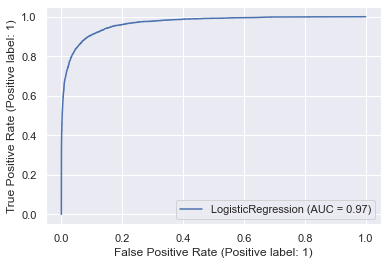

In [251]:
lr.fit(x_train,y_train)
score(lr, x_train,x_test,y_train,y_test,train = True)
score(lr, x_train,x_test,y_train,y_test,train = False)

**- KNeighbors Classifier**


 ----- Train Result ----- 

Accuracy Score: 0.9279901067865439

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    108189
           1       0.92      0.27      0.42     11489

    accuracy                           0.93    119678
   macro avg       0.93      0.63      0.69    119678
weighted avg       0.93      0.93      0.91    119678


 ----- Confusion matrix ----- 
 [[107933    256]
 [  8362   3127]]

 ----- Test Result ----- 

Accuracy Score: 0.9244478981274911

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     36088
           1       0.88      0.24      0.38      3805

    accuracy                           0.92     39893
   macro avg       0.90      0.62      0.67     39893
weighted avg       0.92      0.92      0.90     39893


 ----- Confusion matrix ----- 
 [[35966   122]
 [ 2892   913]]

 ----- Roc

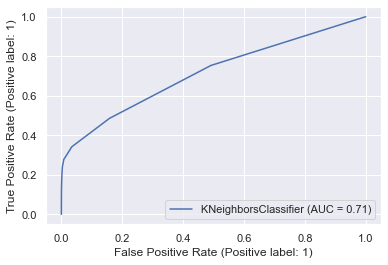

In [252]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)

**- RandomForest Classifier**


 ----- Train Result ----- 

Accuracy Score: 0.9986463677534718

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    108189
           1       1.00      0.99      0.99     11489

    accuracy                           1.00    119678
   macro avg       1.00      0.99      1.00    119678
weighted avg       1.00      1.00      1.00    119678


 ----- Confusion matrix ----- 
 [[108159     30]
 [   132  11357]]

 ----- Test Result ----- 

Accuracy Score: 0.9550547715137994

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     36088
           1       0.83      0.67      0.74      3805

    accuracy                           0.96     39893
   macro avg       0.90      0.83      0.86     39893
weighted avg       0.95      0.96      0.95     39893


 ----- Confusion matrix ----- 
 [[35555   533]
 [ 1260  2545]]

 ----- Roc

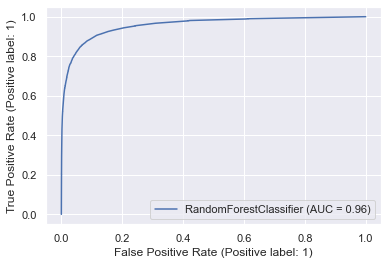

In [253]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)

**- Original VS Predicted**

In [255]:
a_rfc = np.array(y_test)
predicted_rfc = np.array(rf.predict(x_test))
df_rfc = pd.DataFrame({'Original':a_rfc,'Predicted':predicted_rfc})
df_rfc

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
39888,0,0
39889,0,0
39890,0,0
39891,0,0


## Cross-Validation

In [259]:
k_f = KFold(n_splits = 3,shuffle = True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [ ]:
cross_val_score(rf,x,y,cv = 3).mean()

## Hyperparameter Tuning

In [264]:
param = {'n_estimators':range(0,100,10),
         'ccp_alpha':[0.0,0.2,0.4,0.5,0.7,0.8,1.0]
         }

In [ ]:
grid = GridSearchCV(rf,param_grid = param)
grid.fit(x_train,y_train)
print('Best Params = ',grid.best_params_)

**- Saving the model**

In [268]:
filename = 'Malignant.pickle'
pickle.dump(rf, open(filename, 'wb'))